Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping


In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Unzipping image files
!unzip /content/gdrive/MyDrive/CNN_assignment.zip -d /content/gdrive/MyDrive/cnn_assignment

Archive:  /content/gdrive/MyDrive/CNN_assignment.zip
  inflating: /content/gdrive/MyDrive/cnn_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: /content/gdrive/MyDrive/cnn_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: /content/gdrive/MyDrive/cnn_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: /content/gdrive/MyDrive/cnn_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: /content/gdrive/MyDrive/cnn_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: /content/gdrive/MyDrive/cnn_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/cnn_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/cnn_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180
num_classes=9

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    batch_size=batch_size,
    image_size=(img_height,img_width),
    seed=123,
    validation_split=0.2,
    subset='training',
    

)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    batch_size=batch_size,
    image_size=(img_height,img_width),
    seed=123,
    validation_split=0.2,
    subset='validation',
    

)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
for class_name in class_names :
  print(class_name)

actinic keratosis
basal cell carcinoma
dermatofibroma
melanoma
nevus
pigmented benign keratosis
seborrheic keratosis
squamous cell carcinoma
vascular lesion


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

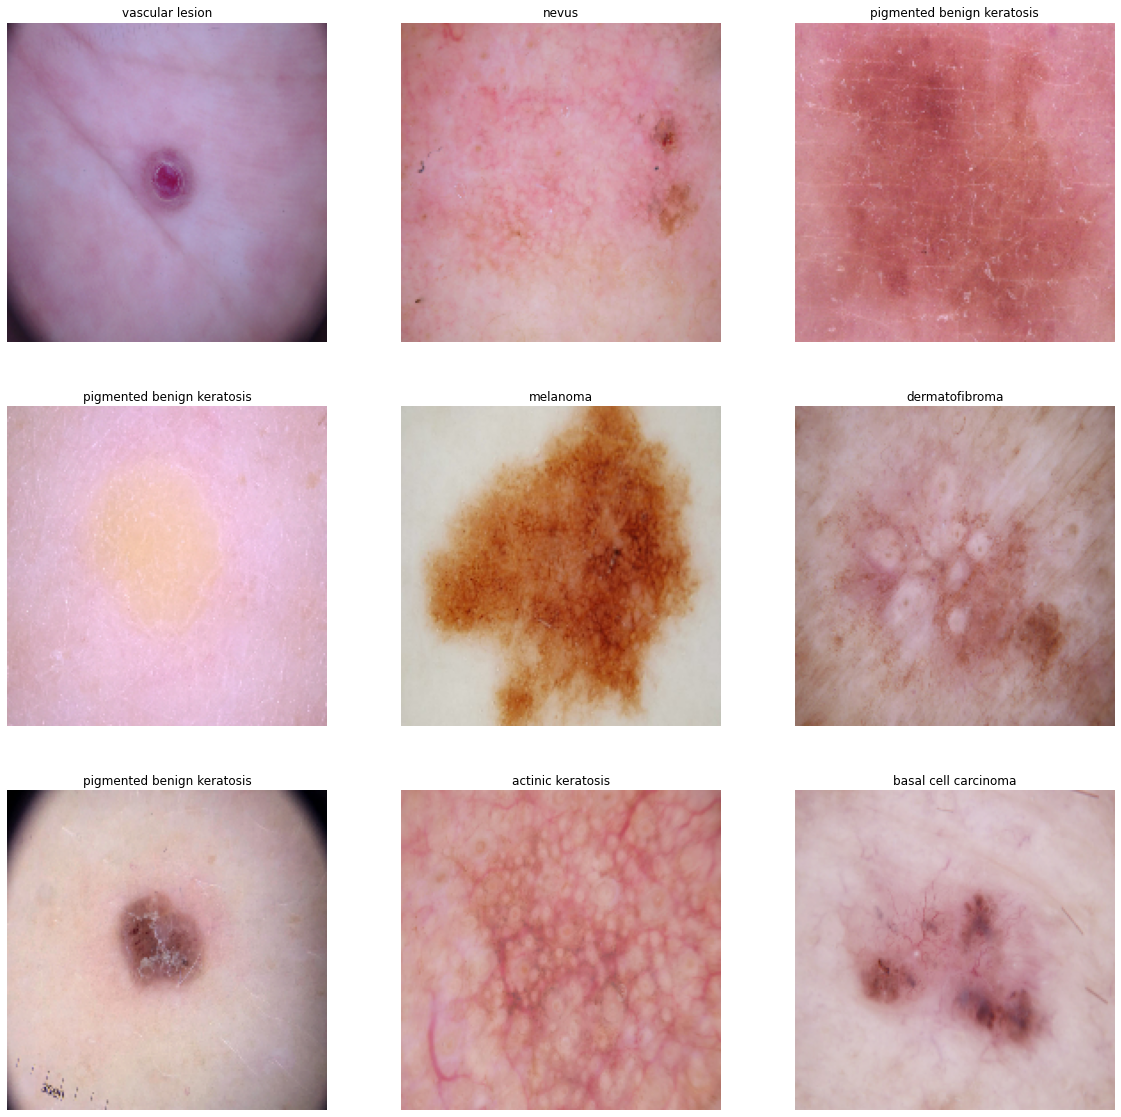

In [10]:
# Visualising all 9 classes 
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(1):
  for i in range(9):
    sub_plot = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here
num_classes=9

model=Sequential([
                  
                  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                  #1st 2D convolution layer
                  layers.Conv2D(32, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  #2nd 2D convolution layer
                  layers.Conv2D(32, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  #3rd 2D convolution layer
                  layers.Conv2D(64, 3, padding='same', activation='relu'),                  
                  layers.MaxPooling2D(),                  
                  layers.Flatten(),                  
                  layers.Dense(128, activation='relu'),                  
                  layers.Dense(num_classes)
                  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])





### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [15]:
#training for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 23s 87ms/step - loss: 1.9504 - accuracy: 0.2706 - val_loss: 1.7862 - val_accuracy: 0.3915
Epoch 2/20
56/56 [==============================] - 2s 30ms/step - loss: 1.6283 - accuracy: 0.4185 - val_loss: 1.6225 - val_accuracy: 0.4720
Epoch 3/20
56/56 [==============================] - 2s 30ms/step - loss: 1.5576 - accuracy: 0.4509 - val_loss: 1.4658 - val_accuracy: 0.4810
Epoch 4/20
56/56 [==============================] - 2s 30ms/step - loss: 1.3378 - accuracy: 0.5346 - val_loss: 1.5275 - val_accuracy: 0.4855
Epoch 5/20
56/56 [==============================] - 2s 30ms/step - loss: 1.2581 - accuracy: 0.5502 - val_loss: 1.4640 - val_accuracy: 0.5034
Epoch 6/20
56/56 [==============================] - 2s 30ms/step - loss: 1.1474 - accuracy: 0.5848 - val_loss: 1.3158 - val_accuracy: 0.5257
Epoch 7/20
56/56 [==============================] - 2s 30ms/step - loss: 1.0556 - accuracy: 0.6200 - val_loss: 1.4351 - val_accuracy: 0.5190
Epoch 8/20
5

### Visualizing training results

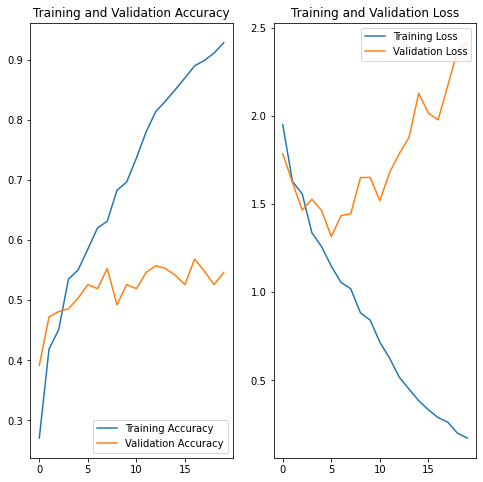

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit



**Observation** : We clearly see the following
1. The model is overfitting as the training accuracy is much higher than validation accuracy as the epoch increases
2. The validation loss increases drastically after 10 epochs indicating overfitting

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomContrast(0.5),
  layers.RandomZoom(height_factor=0.5),
  
])



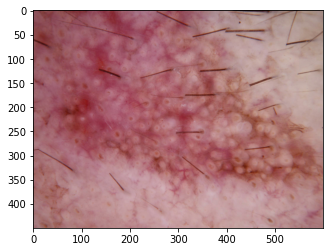

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
img=plt.imread("/content/gdrive/MyDrive/cnn_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025780.jpg")
plt.imshow(img)




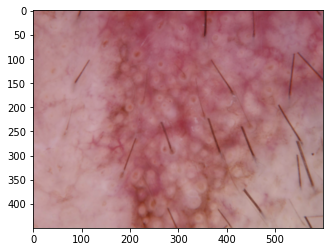

In [19]:
aug_img=data_augmentation(img)
plt.imshow(aug_img.numpy().astype("uint8"))

### Todo:
### Create the model, compile and train the model


In [20]:

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomContrast(0.5),
  layers.RandomZoom(height_factor=0.5),
  
])


In [21]:
### Your code goes here
num_classes=9

model=Sequential([
                  data_augmentation,
                  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                  #1st 2D convolution layer
                  layers.Conv2D(32, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  #2nd 2D convolution layer
                  layers.Conv2D(32, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  #3rd 2D convolution layer
                  layers.Conv2D(64, 3, padding='same', activation='relu'),               
                  layers.MaxPooling2D(),                  
                  layers.Flatten(),                  
                  layers.Dense(128, activation='relu'),                  
                  layers.Dense(num_classes)
                  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])


### Compiling the model

In [22]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [23]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 37ms/step - loss: 2.0465 - accuracy: 0.2539 - val_loss: 1.9105 - val_accuracy: 0.2506
Epoch 2/20
56/56 [==============================] - 2s 36ms/step - loss: 1.7286 - accuracy: 0.3906 - val_loss: 1.5126 - val_accuracy: 0.4877
Epoch 3/20
56/56 [==============================] - 2s 33ms/step - loss: 1.6154 - accuracy: 0.4146 - val_loss: 1.4947 - val_accuracy: 0.4586
Epoch 4/20
56/56 [==============================] - 2s 33ms/step - loss: 1.4923 - accuracy: 0.4626 - val_loss: 1.4409 - val_accuracy: 0.4989
Epoch 5/20
56/56 [==============================] - 2s 33ms/step - loss: 1.5335 - accuracy: 0.4492 - val_loss: 1.4607 - val_accuracy: 0.4676
Epoch 6/20
56/56 [==============================] - 2s 33ms/step - loss: 1.4541 - accuracy: 0.4738 - val_loss: 1.4592 - val_accuracy: 0.4564
Epoch 7/20
56/56 [==============================] - 2s 33ms/step - loss: 1.4399 - accuracy: 0.4788 - val_loss: 1.3730 - val_accuracy: 0.5324
Epoch 8/20
56

### Visualizing the results

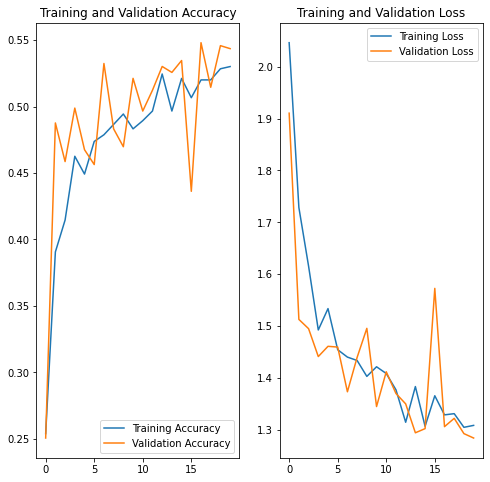

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?



**Observation** : We clearly see that on adding a data augmentation layer, 
1. The model is now not overfitting as the training accuracy is much closer to  validation accuracy as the epoch increases
2. The validation loss decreases drastically indicating overfitting has reduced.

Hence, we can say that image augmentation has helped in reducing the overfitting tendecy of the model

### Expermenting with another set of data augmentation techniques and using dropout

In [25]:

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  

])


In [26]:
### Your code goes here
num_classes=9

model=Sequential([
                 
                
                  
                
                  data_augmentation,
                  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                  #2D convolution layer
                  layers.Conv2D(32, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  #2nd 2D convolution layer
                  layers.Conv2D(32, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Dropout(0.2),  
                  #3rd 2D convolution layer
                  layers.Conv2D(64, 3, padding='same', activation='relu'),                  
                  layers.MaxPooling2D(),
                  # Dropout
                  layers.Dropout(0.2),                  
                  layers.Flatten(),                  
                  layers.Dense(128, activation='relu'),                  
                  layers.Dense(num_classes)
                  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])


### Compiling the model

In [27]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [28]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 35ms/step - loss: 2.1814 - accuracy: 0.2015 - val_loss: 1.9715 - val_accuracy: 0.3132
Epoch 2/20
56/56 [==============================] - 2s 33ms/step - loss: 1.8556 - accuracy: 0.2991 - val_loss: 1.8130 - val_accuracy: 0.3423
Epoch 3/20
56/56 [==============================] - 2s 33ms/step - loss: 1.6818 - accuracy: 0.3945 - val_loss: 1.6664 - val_accuracy: 0.4251
Epoch 4/20
56/56 [==============================] - 2s 33ms/step - loss: 1.5834 - accuracy: 0.4308 - val_loss: 1.5327 - val_accuracy: 0.4609
Epoch 5/20
56/56 [==============================] - 2s 33ms/step - loss: 1.4947 - accuracy: 0.4738 - val_loss: 1.4676 - val_accuracy: 0.4787
Epoch 6/20
56/56 [==============================] - 2s 33ms/step - loss: 1.4124 - accuracy: 0.4883 - val_loss: 1.4270 - val_accuracy: 0.4922
Epoch 7/20
56/56 [==============================] - 2s 33ms/step - loss: 1.3950 - accuracy: 0.4961 - val_loss: 1.4179 - val_accuracy: 0.5257
Epoch 8/20
56

### Visualizing the results

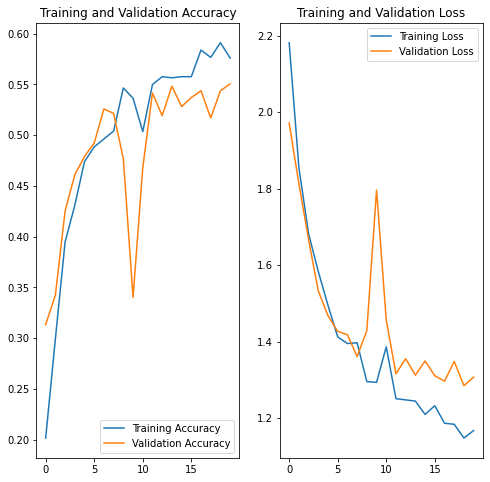

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?





**Observation** : On adding a layer of dropout(0.2), We clearly see the that the model performs better, atleast at low epochs. The overfitting tendency of the model has reduced considerably

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [30]:
## Your code goes here.
count=0
a=[]

for folder in os.listdir("/content/gdrive/MyDrive/cnn_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"):
  for sub_folder in os.listdir("/content/gdrive/MyDrive/cnn_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"+"/"+str(folder)):
    count=count+1
  a.append([folder,count])
  count=0
class_dist=pd.DataFrame(a,columns=['Class','image count']).sort_values(by=['image count'],ascending=False)
class_dist

,Class,image count
5,pigmented benign keratosis,462
3,melanoma,438
1,basal cell carcinoma,376
4,nevus,357
7,squamous cell carcinoma,181
8,vascular lesion,139
0,actinic keratosis,114
2,dermatofibroma,95
6,seborrheic keratosis,77


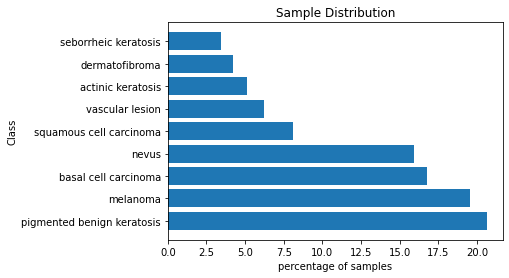

In [31]:
plt.barh(class_dist['Class'],class_dist['image count']/2239*100)
plt.xlabel('percentage of samples')
plt.ylabel('Class')
plt.title('Sample Distribution')
plt.show()


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?




**Observation** : We clearly see the following
1. seborrheic keratosis	has the lowest number of samples with less than 5% of the total samples
2. pigmented benign keratosis	and melanoma dominate the distribution. With both making up 40 % of the samples (each close to 20 %)

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [32]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [33]:
path_to_training_dataset="/content/gdrive/MyDrive/cnn_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnn_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F5F765D0250>: 100%|██████████| 500/500 [00:20<00:00, 24.49 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnn_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F5F765724D0>: 100%|██████████| 500/500 [00:22<00:00, 22.58 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnn_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F5F7890FD10>: 100%|██████████| 500/500 [00:21<00:00, 22.82 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnn_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F5F788CBF10>: 100%|██████████| 500/500 [01:30<00:00,  5.52 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnn_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F5F789F6F10>: 100%|██████████| 500/500 [01:22<00:00,  6.10 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnn_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5F788DC210>: 100%|██████████| 500/500 [00:17<00:00, 28.41 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnn_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F5F788A22D0>: 100%|██████████| 500/500 [00:42<00:00, 11.86 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnn_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5F7897E290>: 100%|██████████| 500/500 [00:18<00:00, 26.94 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/cnn_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5F78845410>: 100%|██████████| 500/500 [00:17<00:00, 28.17 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [34]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [35]:
from glob import glob
path_list_old = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]


In [36]:
lesion_list_old = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]


In [37]:
dataframe_dict_old = dict(zip(path_list_old, lesion_list_old))

In [38]:
original_df = pd.DataFrame(list(dataframe_dict_old.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/cnn_assignment/Skin ca...,actinic keratosis
1,/content/gdrive/MyDrive/cnn_assignment/Skin ca...,actinic keratosis
2,/content/gdrive/MyDrive/cnn_assignment/Skin ca...,actinic keratosis
3,/content/gdrive/MyDrive/cnn_assignment/Skin ca...,actinic keratosis
4,/content/gdrive/MyDrive/cnn_assignment/Skin ca...,actinic keratosis
...,...,...
2234,/content/gdrive/MyDrive/cnn_assignment/Skin ca...,vascular lesion
2235,/content/gdrive/MyDrive/cnn_assignment/Skin ca...,vascular lesion
2236,/content/gdrive/MyDrive/cnn_assignment/Skin ca...,vascular lesion
2237,/content/gdrive/MyDrive/cnn_assignment/Skin ca...,vascular lesion


In [39]:
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

In [40]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]


In [41]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]


In [42]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [43]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [44]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [45]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [46]:
data_dir_train="/content/gdrive/MyDrive/cnn_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [47]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [48]:
## your code goes here

num_classes=9

model=Sequential([
                  data_augmentation,
                  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                  #1st 2D convolution layer
                  layers.Conv2D(32, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  #2nd 2D convolution layer
                  layers.Conv2D(32, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  #Dropout
                  layers.Dropout(0.2),
                  #3rd 2D convolution layer
                  layers.Conv2D(64, 3, padding='same', activation='relu'),                  
                  layers.MaxPooling2D(),
                  #Batch normalization
                  layers.BatchNormalization(), 
                  layers.Dropout(0.2),
                                 
                  layers.Flatten(),                  
                  layers.Dense(128, activation='relu'),                  
                  
                  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])






#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [49]:

## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [50]:

## Your code goes here, use 20 epochs.

epochs = 20
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 44s 246ms/step - loss: 1.9301 - accuracy: 0.3464 - val_loss: 2.5554 - val_accuracy: 0.1834
Epoch 2/20
169/169 [==============================] - 31s 180ms/step - loss: 1.5981 - accuracy: 0.4225 - val_loss: 2.1863 - val_accuracy: 0.2175
Epoch 3/20
169/169 [==============================] - 30s 173ms/step - loss: 1.4893 - accuracy: 0.4405 - val_loss: 1.8274 - val_accuracy: 0.3333
Epoch 4/20
169/169 [==============================] - 30s 173ms/step - loss: 1.4956 - accuracy: 0.4408 - val_loss: 1.8689 - val_accuracy: 0.3281
Epoch 5/20
169/169 [==============================] - 30s 173ms/step - loss: 1.4266 - accuracy: 0.4661 - val_loss: 1.6905 - val_accuracy: 0.3905
Epoch 6/20
169/169 [==============================] - 30s 173ms/step - loss: 1.4167 - accuracy: 0.4700 - val_loss: 1.5722 - val_accuracy: 0.4157
Epoch 7/20
169/169 [==============================] - 30s 173ms/step - loss: 1.4029 - accuracy: 0.4774 - val_loss: 1.9328 - val_ac

#### **Todo:**  Visualize the model results

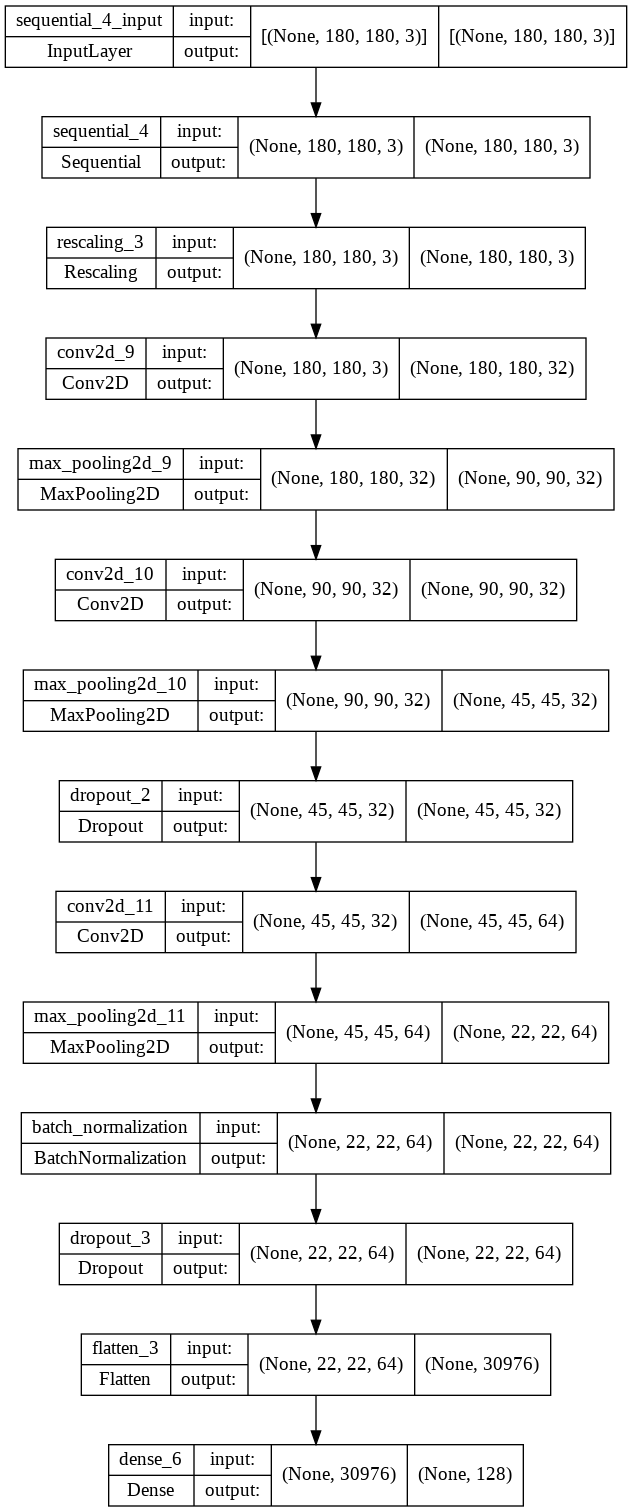

In [51]:
# vizualizing the model 
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

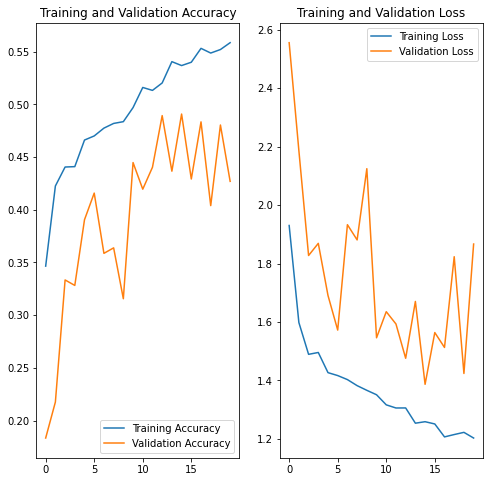

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

**Observation** : On addding a batch normalization layer and using over sampling technique, we notice the performance of our model to improve. We notice that our model is now performing better as the validation score and training score following the same trend line

This could be further improved by 
1. increasing neurons
2. adding more layers
3. Improving hyper parameters

In [53]:
#!rm  -rf "/content/gdrive/MyDrive/cnn_assignment/Skin cancer ISIC The International Skin Imaging Collaboration"